In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# from six_axis_utility.utilities import quaternion_to_euler

# Load the CSV file
file_path = "./imu_data_2.csv"
df = pd.read_csv(file_path)

# Display the first few rows to understand the structure
df.head()

,timestamp,orientation_x,orientation_y,orientation_z,orientation_w,angular_velocity_x,angular_velocity_y,angular_velocity_z,linear_acceleration_x,linear_acceleration_y,linear_acceleration_z
0,1.729480e+09,0.0,0.0,-0.708101,0.706111,0.0,0.0,0.0,0.000000,0.000000,9.810001
1,1.729480e+09,0.0,0.0,-0.708101,0.706111,0.0,0.0,0.0,0.159943,0.020450,9.809999
2,1.729480e+09,0.0,0.0,-0.708101,0.706111,0.0,0.0,0.0,-0.000056,0.020000,9.810000
3,1.729480e+09,0.0,0.0,-0.708101,0.706111,0.0,0.0,0.0,-0.039944,-0.020112,9.809999
4,1.729480e+09,0.0,0.0,-0.708101,0.706111,0.0,0.0,0.0,-0.159831,-0.060450,9.810001


In [6]:
# Drop the timestamp columns to calculate statistics for the rest
df_filtered = df.drop(columns=["timestamp", "timestamp_normalized"], errors="ignore")

# Calculate min, max, and standard deviation for each column using pandas
min_values = df_filtered.min()
max_values = df_filtered.max()
std_values = df_filtered.std()

# Display the results
print("Minimum Values for Each Column:")
print(min_values)
print("\nMaximum Values for Each Column:")
print(max_values)
print("\nStandard Deviation for Each Column:")
print(std_values)

Minimum Values for Each Column:
orientation_x            -0.022468
orientation_y            -0.007960
orientation_z            -0.999999
orientation_w             0.000064
angular_velocity_x      -29.932344
angular_velocity_y      -15.108447
angular_velocity_z      -99.900000
linear_acceleration_x   -99.900000
linear_acceleration_y   -99.900000
linear_acceleration_z   -45.132725
dtype: float64

Maximum Values for Each Column:
orientation_x             0.007704
orientation_y             0.033826
orientation_z             0.999999
orientation_w             1.000000
angular_velocity_x       50.425309
angular_velocity_y       12.013341
angular_velocity_z       92.332826
linear_acceleration_x    28.832527
linear_acceleration_y    71.405701
linear_acceleration_z    73.284042
dtype: float64

Standard Deviation for Each Column:
orientation_x             0.002921
orientation_y             0.003238
orientation_z             0.583237
orientation_w             0.285962
angular_velocity_x        2.

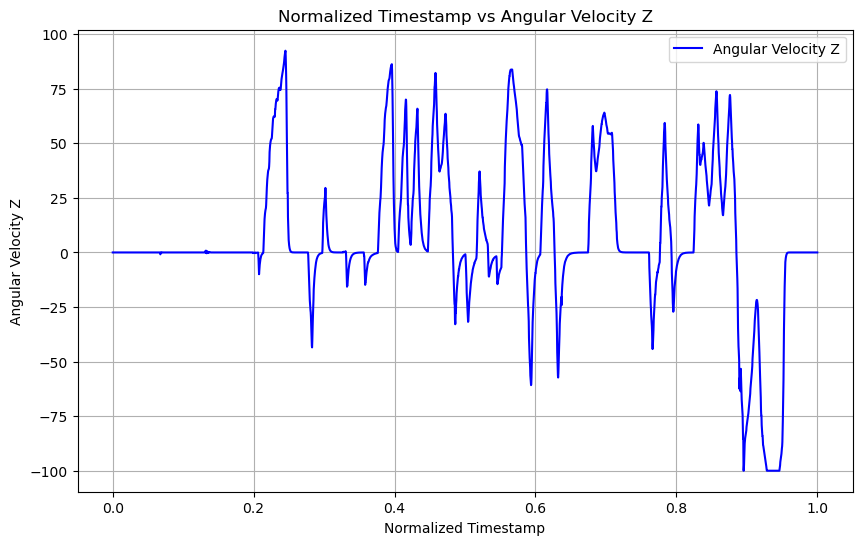

In [7]:
# Normalize the timestamp to range [0, 1] for this session
min_timestamp = df["timestamp"].min()
max_timestamp = df["timestamp"].max()

# Apply normalization
df["timestamp_normalized"] = (df["timestamp"] - min_timestamp) / (
    max_timestamp - min_timestamp
)

# Plot timestamp (normalized) versus angular_velocity_z
plt.figure(figsize=(10, 6))
plt.plot(
    df["timestamp_normalized"],
    df["angular_velocity_z"],
    label="Angular Velocity Z",
    color="b",
)
plt.xlabel("Normalized Timestamp")
plt.ylabel("Angular Velocity Z")
plt.title("Normalized Timestamp vs Angular Velocity Z")
plt.legend()
plt.grid(True)
plt.show()